In [57]:
from random import random,randrange,seed
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

In [58]:
def MonteCarloQuantumBox(T,N,steps,n):

    eplot = [] 
    E = np.pi*np.pi/2*(n**2).sum()

    for k in range(steps):
        i = randrange(N)
        j = randrange(3)
        if random()<0.5:
            dn = 1
            dE = (2*n[i,j]+1)*np.pi*np.pi/2
        else:
            dn = -1
            dE = (-2*n[i,j]+1)*np.pi*np.pi/2

        if n[i,j]>1 or dn==1: 
            if dn == -1 or random()< np.exp(-dE/T):
                n[i,j] += dn
                E += dE

        eplot.append(E)
    
    return np.array(eplot)/N

In [59]:
T = 10.0
N = 1000
steps = 500000
n = np.ones([N,3],int) 
energia = MonteCarloQuantumBox(T,N,steps,n)
print(energia)

[14.8044066  14.8044066  14.8044066  ... 25.15268682 25.15268682
 25.15268682]


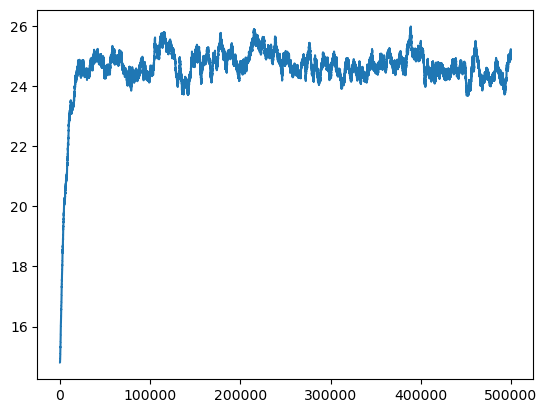

In [60]:
plt.plot(energia)
plt.show()

In [61]:
equil = 400000
eprom = energia[equil:].mean()
print(eprom)

24.484692645885698


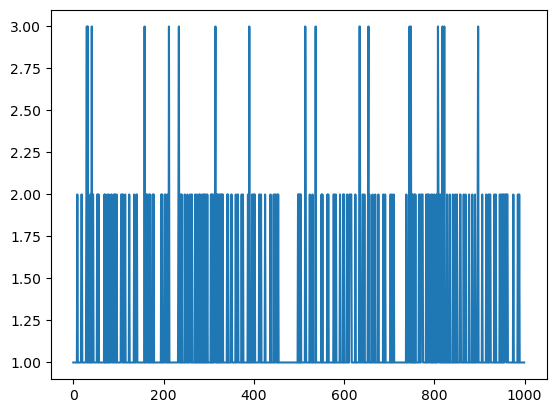

In [62]:
plt.plot(n[:,1])

In [63]:
T = 10.0
N = 1000
steps = 500000
#estado inicial random entre 1 y 4 para todos los número cuánticos
n = nr.randint(1,3,(N,3))
energia2 = MonteCarloQuantumBox(T,N,steps,n)

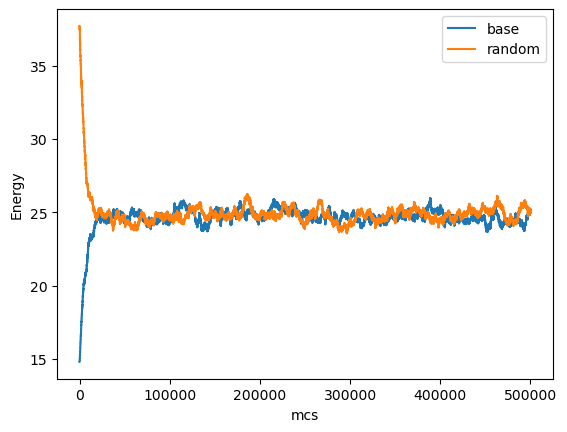

In [64]:
plt.plot(energia,label = 'base')
plt.plot(energia2,label = 'random')
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.legend(loc ='upper right')
plt.show()

In [65]:
#una sola partícula
T = 10.0
N = 1
steps = 500000
n = np.ones([N,3],int) 
energia = MonteCarloQuantumBox(T,N,steps,n)

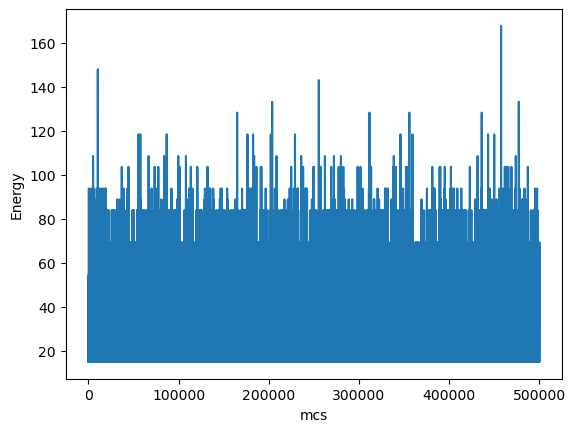

In [67]:
plt.plot(energia)
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.show()

In [68]:
#misma energía promedio
equil = 100000
eprom = energia[equil:].mean()
print(eprom)

24.792483266563465


In [69]:
T = 10000.0
N = 1
steps = 10000000
n = np.ones([N,3],int) 
energia = MonteCarloQuantumBox(T,N,steps,n)

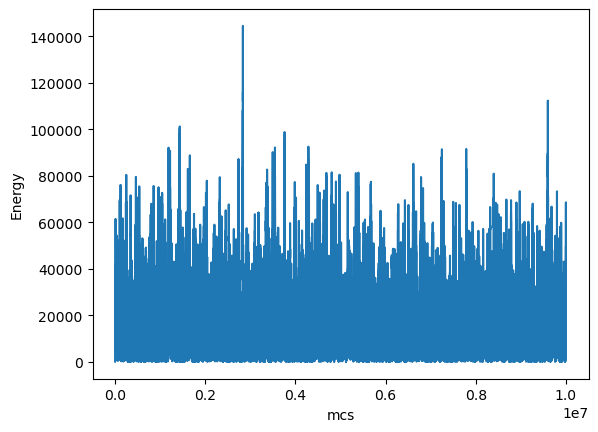

In [70]:
plt.plot(energia)
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.show()

In [71]:
equil = 100000
eprom = energia[equil:].mean()
print(eprom)
#comparamos con gas ideal clásico
print((eprom - 1.5*T)/(1.5*T))

16037.270023888923
0.06915133492592819


In [72]:
def GasIdealClasicod1(T,v0,delta,steps):
    beta = 1./T
    k0 = 0.5*v0*v0
    energia = [k0]
    Velocity = [v0]

    for mcs in range(steps):
        vprueba = v0  + (2*random()-1)*delta
        kprueba = 0.5*vprueba*vprueba
        dk = kprueba-k0
        if dk < 0 or random() < np.exp(-beta*dk):
            v0 = vprueba
            k0 = kprueba
        energia.append(k0)
        Velocity.append(v0)
    return np.array(energia),np.array(Velocity)

In [87]:
T = 5
v0 = 10 
delta = 5 
steps = 1000000
energia,velocidad = GasIdealClasicod1(T,v0,delta,steps)

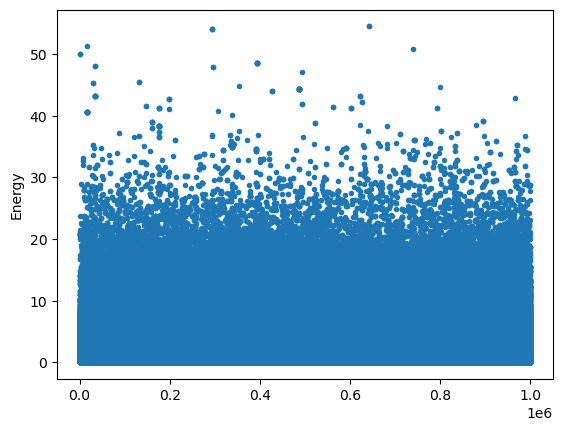

In [88]:
plt.plot(energia,'.')
plt.ylabel("Energy")
plt.show()

In [89]:
Eprom= np.mean(energia[1000:])
print('<E> = {0:.3f}, kBT/2 = {1:.2f}, error = {2:.2f}%'.format(Eprom,0.5*T,np.abs(Eprom-0.5*T)/(0.5*T)*100))

<E> = 2.489, kBT/2 = 2.50, error = 0.43%


Text(2.5, 0.12, '$P_B(v) = \\sqrt{\\beta m/2\\pi}\\,\\exp(-\\beta m v^2/2)$')

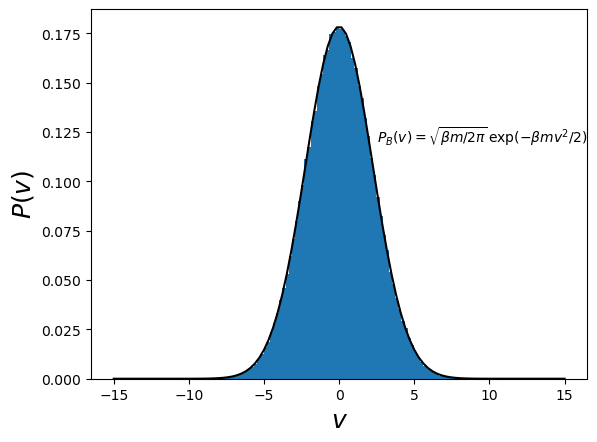

In [90]:
beta = 1/T
n, bins, patches = plt.hist(velocidad, bins = 100,density=True)
x = np.linspace(-15,15,100)
Pb = np.sqrt(beta/(2*np.pi))*np.exp(-beta*x**2/2)
plt.plot(x,Pb,'k-')
plt.ylabel(r'$P(v)$',fontsize = 18)
plt.xlabel(r'$v$',fontsize = 18)
plt.text(2.5,0.12,r'$P_B(v) = \sqrt{\beta m/2\pi}\,\exp(-\beta m v^2/2)$')